## Stock Market Analysis of Infosys and Wipro

##### Infosys Limited is an Indian multinational information technology company that provides business consulting, information technology and outsourcing services. The company was founded in Pune and is headquartered in Bangalore. Wipro Limited is an Indian multinational corporation that provides information technology, consulting and business process services. Delaporte has served as CEO and managing director of Wipro from July 2020. It is headquartered in Bangalore, Karnataka.

###### In this program I will analyse stocks of Infosys and Wipro since 2018

##### Importing neccessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader
import pandas_datareader.data as web
import datetime

In [3]:
start=datetime.datetime(2018,1,1)
end=datetime.datetime.today()

##### Downloading data

In [4]:
# Wipro Limited
wip=web.DataReader("WIT","yahoo",start,end).reset_index()
wip.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,5.71,5.49,5.50,5.71,1676400.0,5.589038
1,2018-01-03,5.71,5.57,5.68,5.67,1508000.0,5.549885
2,2018-01-04,5.73,5.63,5.68,5.65,1610400.0,5.530309
3,2018-01-05,5.68,5.52,5.65,5.56,1210100.0,5.442216
4,2018-01-08,5.69,5.55,5.56,5.67,970300.0,5.549885


In [5]:
#Infosys
inf=web.DataReader("INFY","yahoo",start,end).reset_index()
inf.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-02,8.195,8.115,8.135,8.145,12298200.0,7.208185
1,2018-01-03,8.135,8.050,8.120,8.075,10250800.0,7.146235
2,2018-01-04,8.100,8.010,8.100,8.025,16272000.0,7.101986
3,2018-01-05,8.190,8.075,8.085,8.175,9813600.0,7.234734
4,2018-01-08,8.260,8.170,8.190,8.240,11198200.0,7.292256


 ###### Lets plot a line graph for opening prices of both stocks. Opening prices of both companies have been increasing over time with a positive trend.

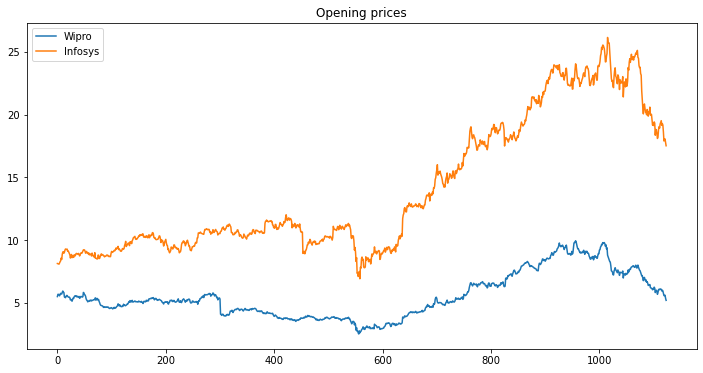

In [6]:
plt.figure(figsize=(12,6))
wip['Open'].plot(label="Wipro",title="Opening prices")
inf['Open'].plot(label="Infosys")
plt.legend(loc="best")

##### let's plot the Volume of each stock that was traded every day.

<AxesSubplot:title={'center':'Volume Traded'}>

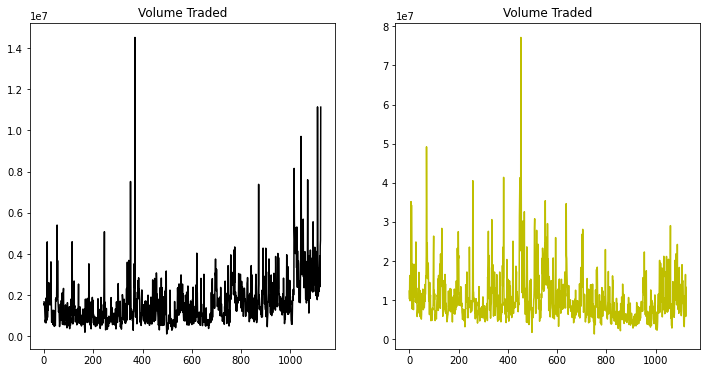

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
wip['Volume'].plot(label="Wipro",title="Volume Traded",color='k')
plt.subplot(1,2,2)
inf['Volume'].plot(label="Infosys",title="Volume Traded",color='y')

##### As shown in the graph below infosys stocks are traded at a much higher volume than Wipro stocks.

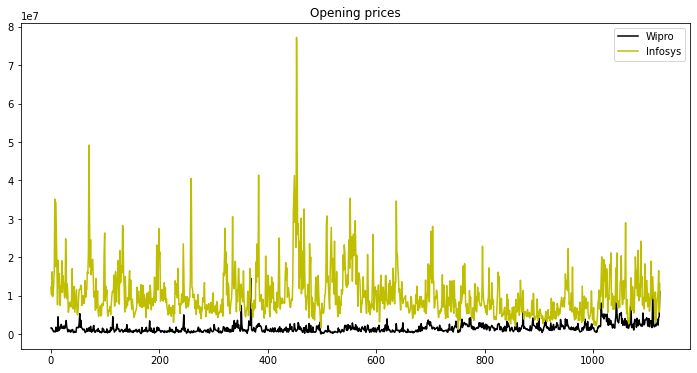

In [67]:
plt.figure(figsize=(12,6))
wip['Volume'].plot(label="Wipro",title="Opening prices",color='k')
inf['Volume'].plot(label="Infosys",color='y')
plt.legend(loc="best")

#### Another useful visual would be a visual of the total volume that was traded.

<AxesSubplot:>

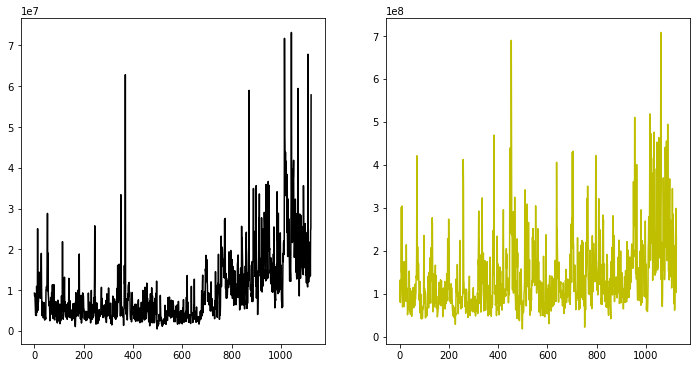

In [65]:
wip['Total Traded'] = wip['Open']*wip['Volume']
inf['Total Traded'] = inf['Open']*inf['Volume']
plt.subplot(1,2,1)
wip['Total Traded'].plot(figsize = (12,6), label = 'Wipro',color='k')
plt.subplot(1,2,2)
inf['Total Traded'].plot(figsize = (12,6), label = 'Infosys',color='y')

##### To make it more precise, let's use average prices instead of the price at the opening.

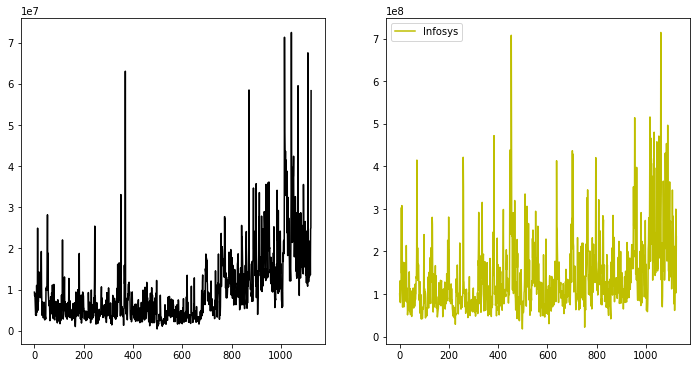

In [75]:
wip['Avg']=wip[['High','Low']].mean(axis=1)
inf['Avg']=inf[['High','Low']].mean(axis=1)
wip['Total_traded_new']=wip['Avg']*wip['Volume']
inf['Total_traded_new']=inf['Avg']*inf['Volume']
plt.subplot(1,2,1)
wip['Total_traded_new'].plot(figsize = (12,6), label = 'Wipro',color='k')
plt.subplot(1,2,2)
inf['Total_traded_new'].plot(figsize = (12,6), label = 'Infosys',color='y')
plt.legend(loc="best")

##### Using average prices instead of the price at the opening.

<AxesSubplot:>

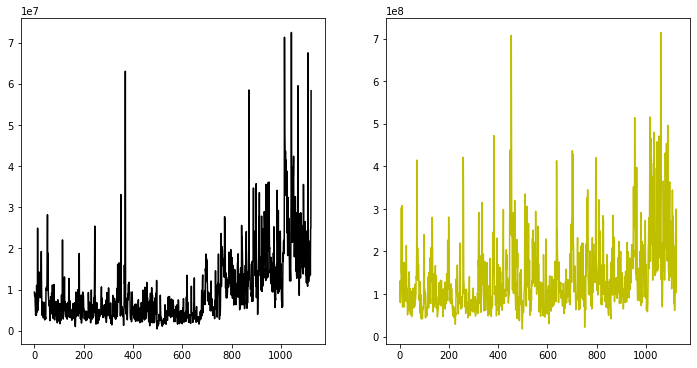

In [80]:
wip['Avg'] = wip[['High', 'Low']].mean(axis=1)
inf['Avg'] = inf[['High', 'Low']].mean(axis=1)
wip['Total Traded New'] = wip['Avg']*wip['Volume']
inf['Total Traded New'] = inf['Avg']*inf['Volume']
plt.subplot(1,2,1)
wip['Total Traded New'].plot(figsize = (12,6), label = 'Wipro',color='k')
plt.subplot(1,2,2)
inf['Total Traded New'].plot(figsize = (12,6), label = 'Infosys',color='y')


### Moving Average

###### Moving Average (MA) is widely used in technical analysis to smooth out the price by taking out the "noise" from random short-term price changes. Since it is based on historical prices, it is a lagging or trend-following indicator.

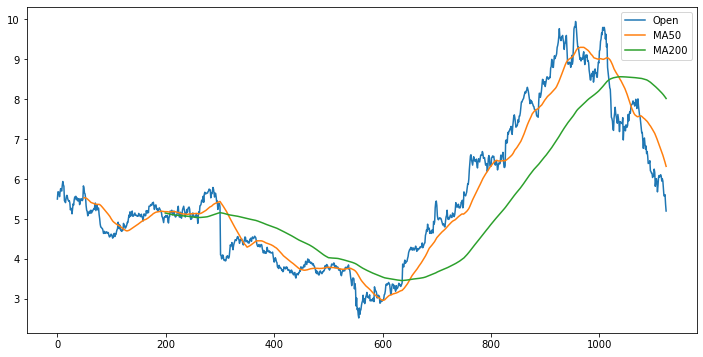

In [10]:
wip['MA50'] = wip['Open'].rolling(50).mean()
wip['MA200'] = wip['Open'].rolling(200).mean()
wip[['Open','MA50','MA200']].plot(figsize = (12,6))
inf['MA50'] = inf['Open'].rolling(50).mean()
inf['MA200'] = inf['Open'].rolling(200).mean()


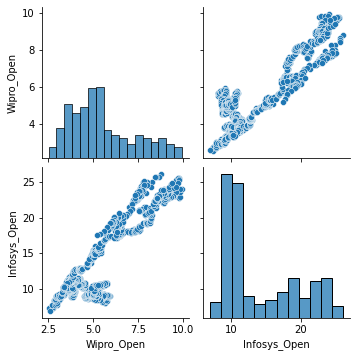

In [11]:
ret_comp=pd.concat([wip['Open'],inf['Open']],axis=1)
ret_comp.columns=['Wipro_Open','Infosys_Open']
sns.pairplot(ret_comp)

In [12]:
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator, DayLocator, MONDAY

###### By looking at a daily percentage change, it can be concluded stock's volatility and how risky it is: more volatility = more risk.

In [13]:
wip['Returns'] = wip['Close'].pct_change(1)
inf['Returns'] = inf['Close'].pct_change(1)

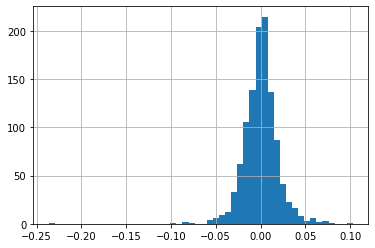

In [14]:
wip['Returns'].hist(bins = 50)

<AxesSubplot:>

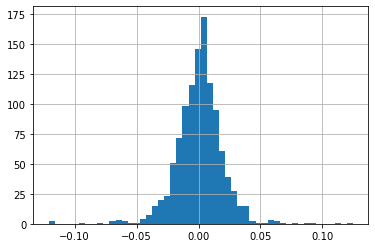

In [15]:
inf['Returns'].hist(bins = 50)

#### Visualizing the Probability Density of a time series. The higher the pick = less volatile the time series.

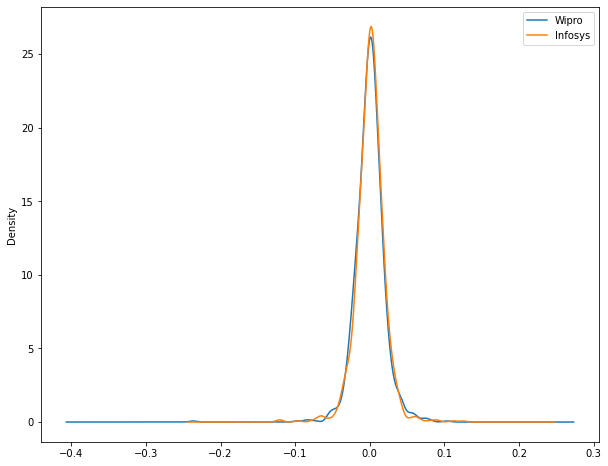

In [19]:
wip['Returns'].plot(kind='kde', label = 'Wipro', figsize=(10,8))
inf['Returns'].plot(kind='kde', label = 'Infosys',figsize=(10,8))
plt.legend()

#### Box Plot of Returns

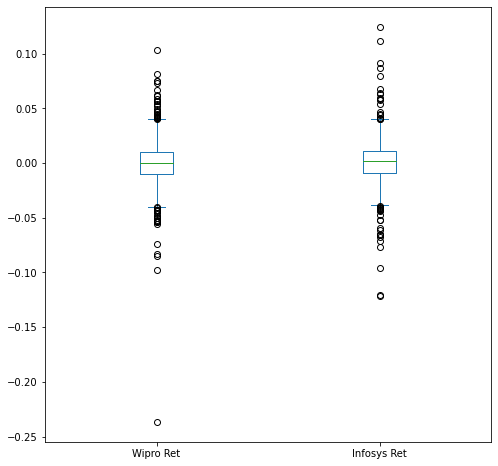

In [21]:
box_df = pd.concat([wip['Returns'], inf['Returns']], axis = 1)
box_df.columns = ['Wipro Ret', 'Infosys Ret']
box_df.plot(kind='box', figsize = (8,8));

##### To see the correlation of the daily returns scatterplots can used.

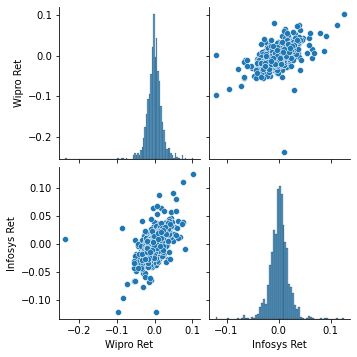

In [24]:
sns.pairplot(box_df)

##### Based on the scatterplots, can be said that the data is normally distributed and symmetric around 0. Also, as seen in the graph above, a positive correlation is still present between Wipro and Infosys stock returns.